## Loan credit default  Analysis

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_risk.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Categorical data : person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file
### Numerical data : person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_status

## Descriptive Analysis

In [90]:
df.shape

(32581, 12)

In [91]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
for i in df.columns:
    print(f'{i} : ',df[i].unique())

person_age :  [ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]
person_income :  [  59000    9600   65500 ...  720000 1900000    4888]
person_home_ownership :  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
person_emp_length :  [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]
loan_intent :  ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade :  ['D' 'B' 'C' 'A' 'E' 'F' 'G']
loan_amnt :  [35000  1000  5500  2500  1600  4500 30000  1750 34800 34000  1500 33950
 33000  4575  1400 32500  4000  2000 32000 31050 24250  7800 20000 10000
 25000 18000 12000 29100 28000  9600  3000  6100  4200  4750  4800  2700
 27600  3250 27500 27050 27000 260

In [92]:
df['person_age'].sort_values()

1313      20
12943     20
14827     20
15830     20
11902     20
        ... 
575      123
747      123
81       144
183      144
32297    144
Name: person_age, Length: 32581, dtype: int64

In [5]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [94]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [95]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [96]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [97]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [98]:
df['cb_person_cred_hist_length'].value_counts()

2     5965
3     5943
4     5925
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
27      22
22      22
23      22
30      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: cb_person_cred_hist_length, dtype: int64

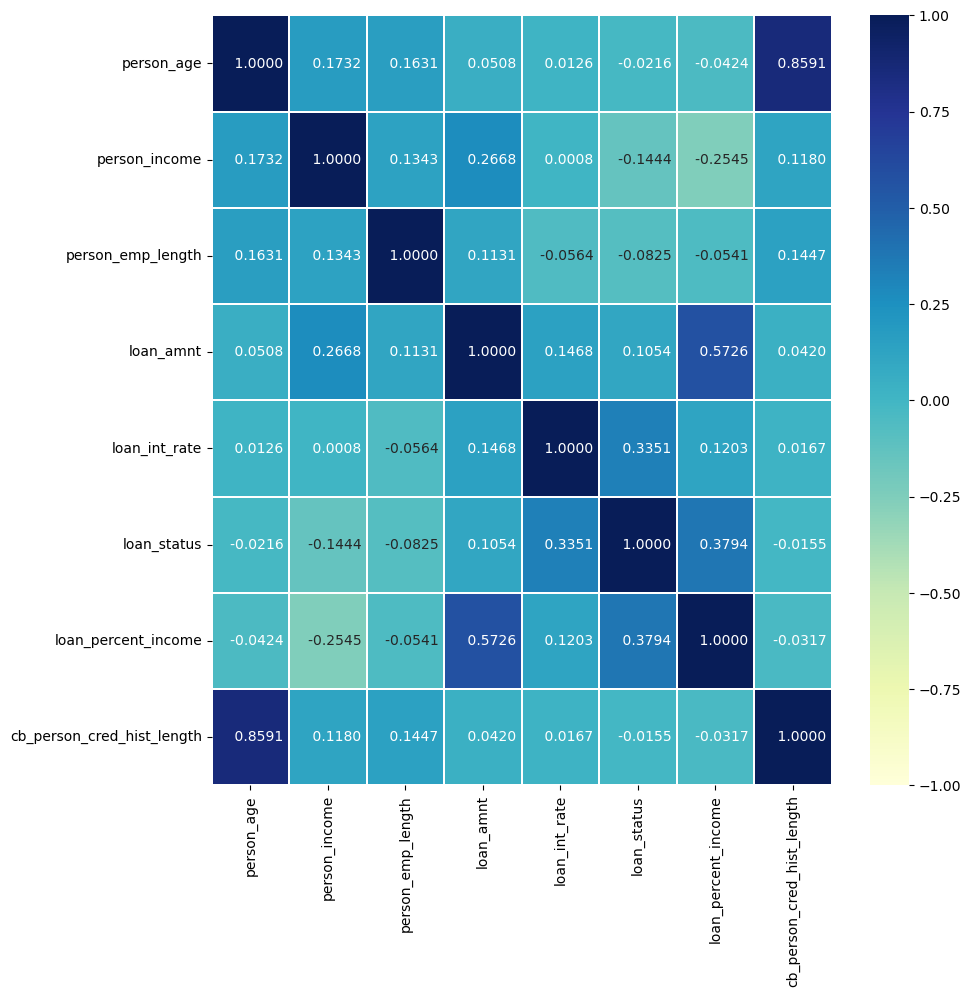

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(df.corr(), annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()

#### data is moderately correlated.

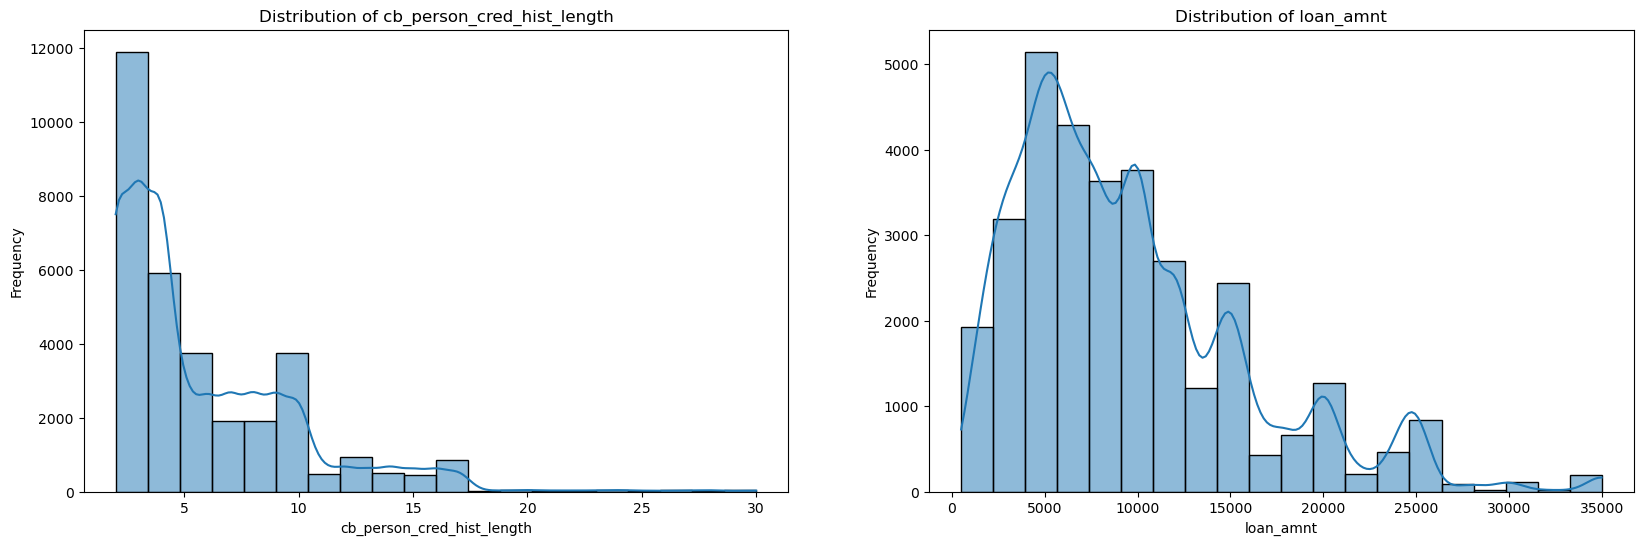

In [99]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True)
plt.title('Distribution of cb_person_cred_hist_length')
plt.xlabel('cb_person_cred_hist_length')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Distribution of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.show()

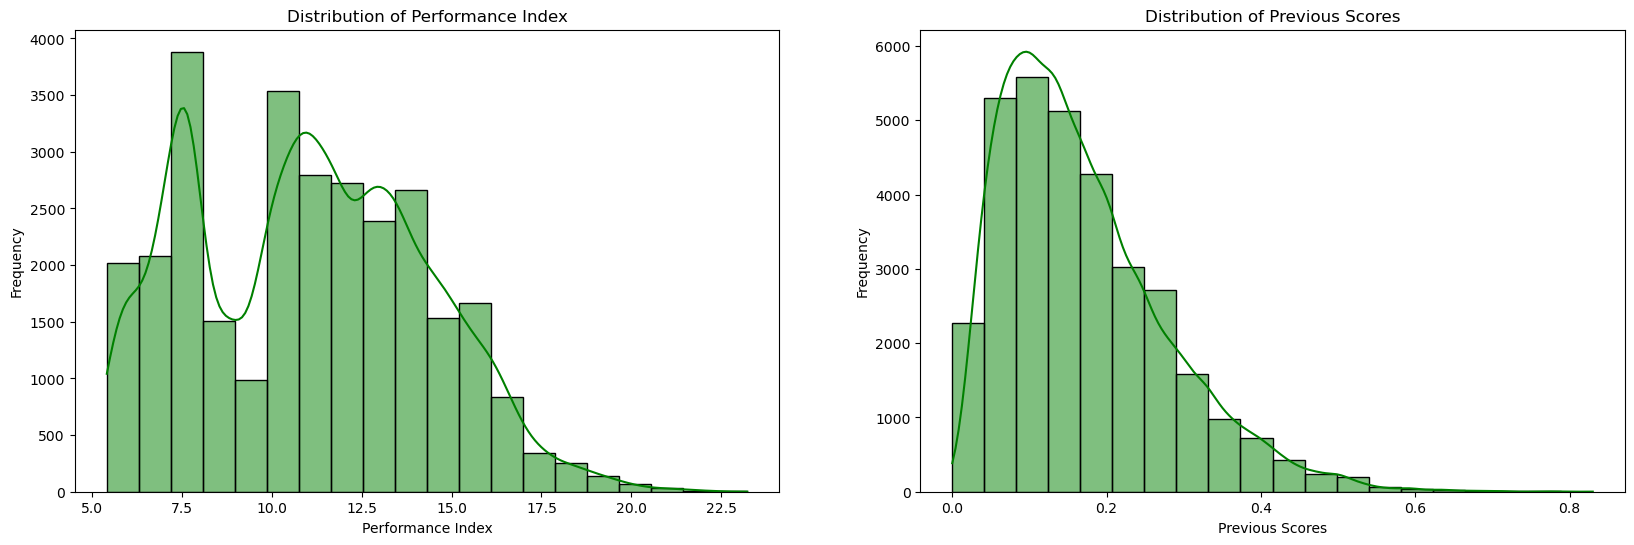

In [100]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['loan_int_rate'], bins=20, kde=True,color='green')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_percent_income'], bins=20, kde=True,color='green')
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Frequency')

plt.show()

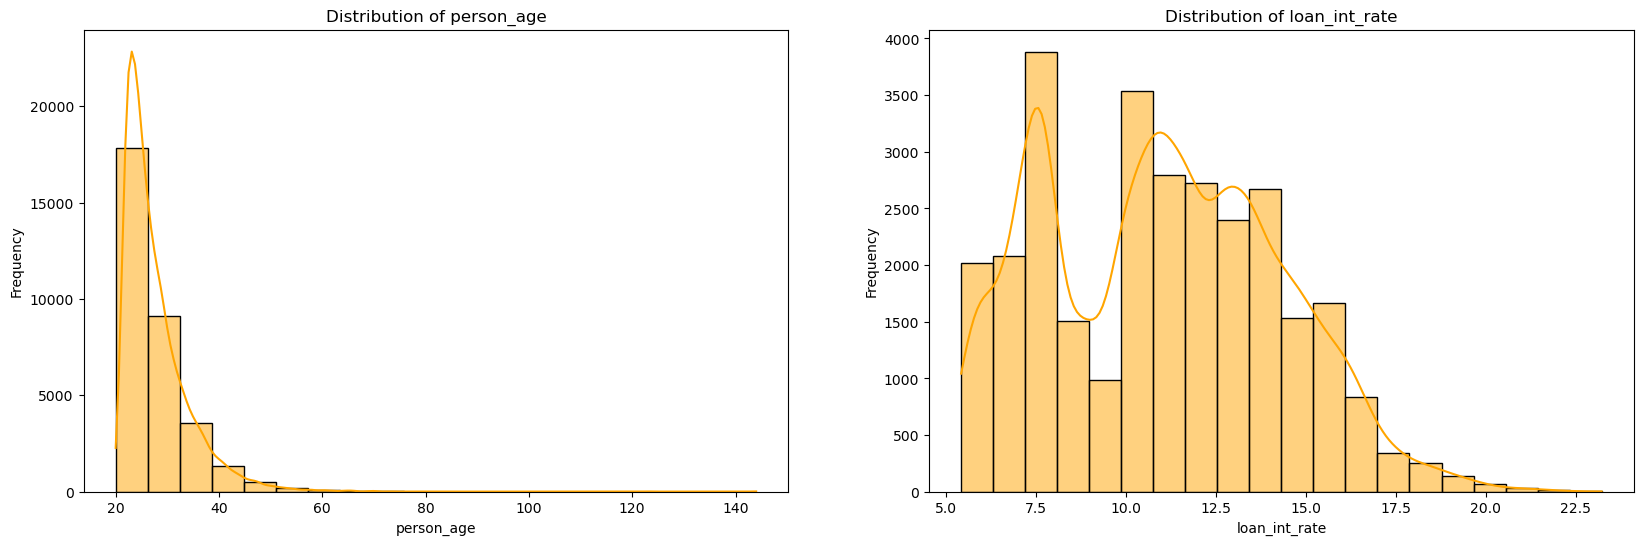

In [101]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['person_age'], bins=20, kde=True,color='orange')
plt.title('Distribution of person_age')
plt.xlabel('person_age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_int_rate'], bins=20, kde=True,color='orange')
plt.title('Distribution of loan_int_rate')
plt.xlabel('loan_int_rate')
plt.ylabel('Frequency')

plt.show()

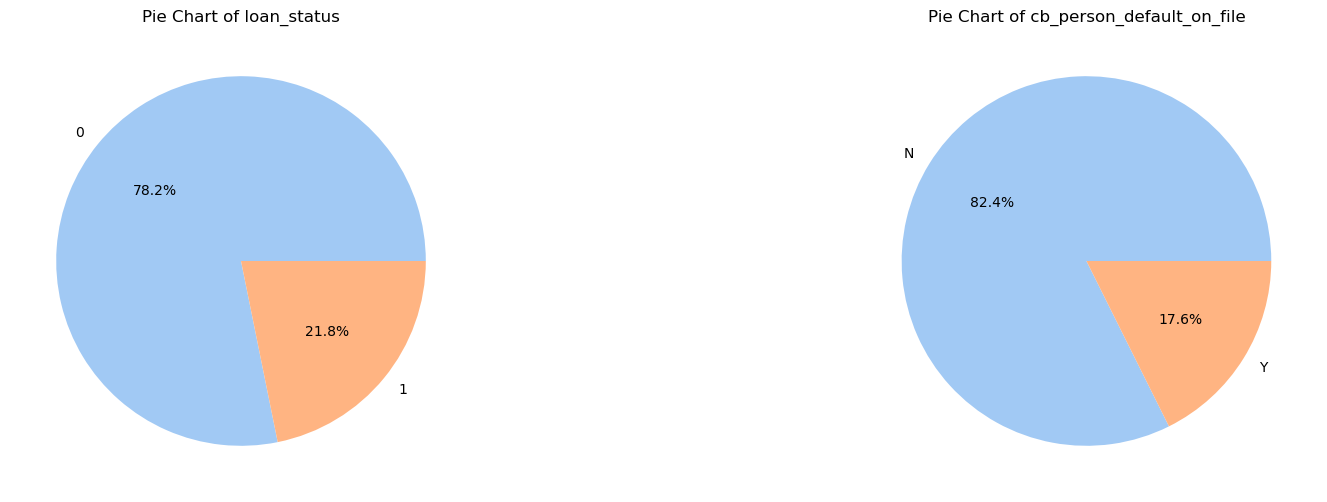

In [102]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of loan_status')
plt.ylabel('')

plt.subplot(1,2,2)
df['cb_person_default_on_file'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of cb_person_default_on_file')
plt.ylabel('')

plt.show()

In [15]:
category = df[['person_home_ownership', 'loan_grade', 'cb_person_default_on_file', 'loan_intent']]

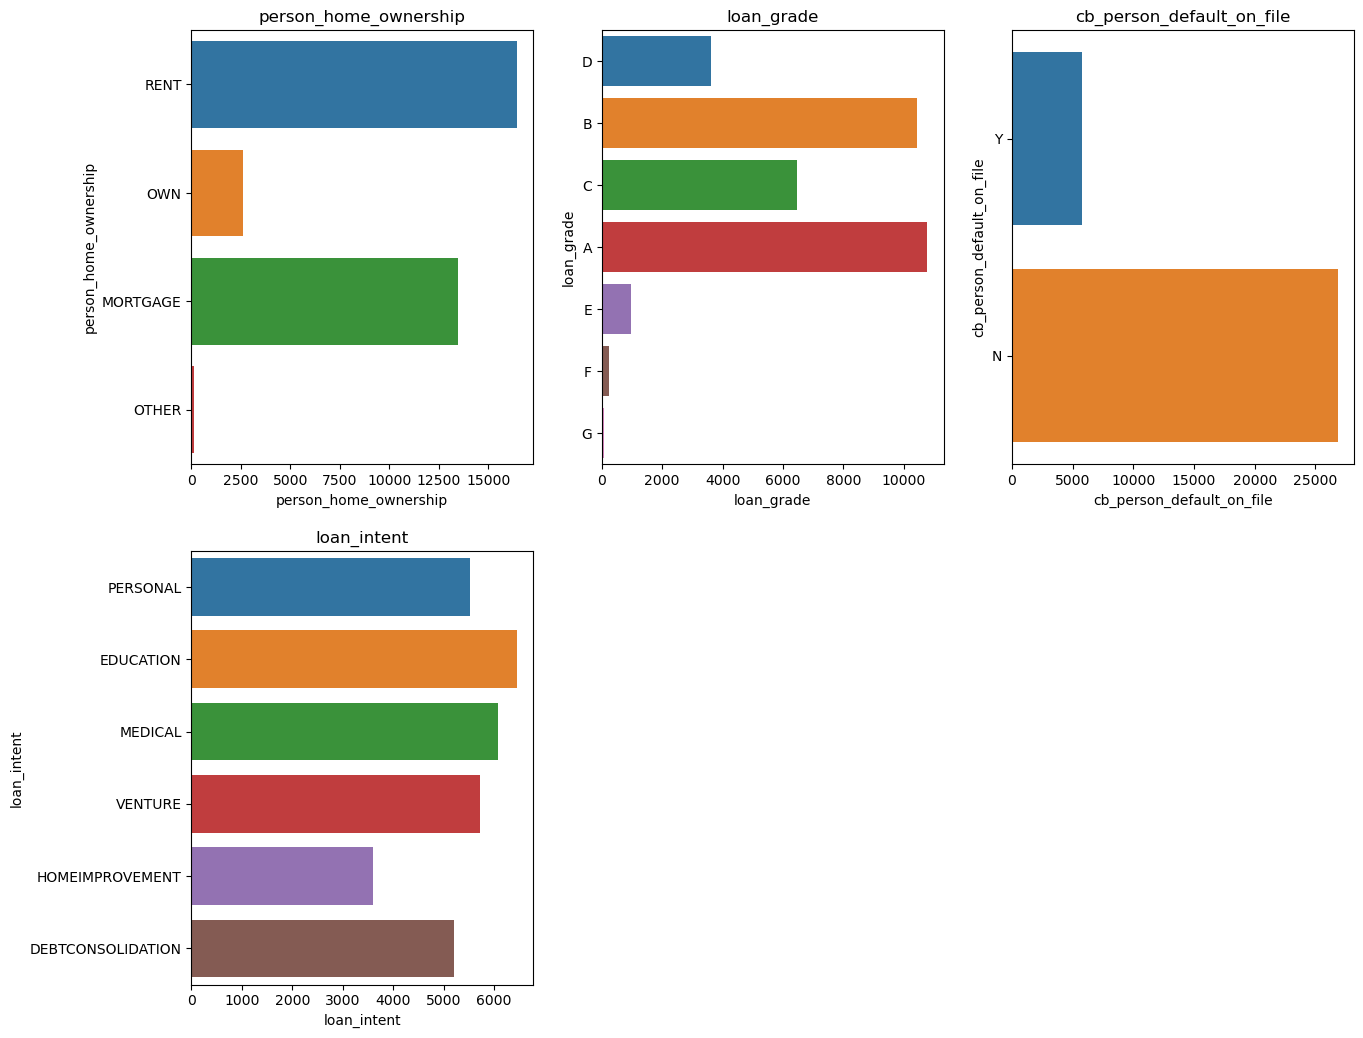

In [16]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in category:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Inferences

### person's age analysis

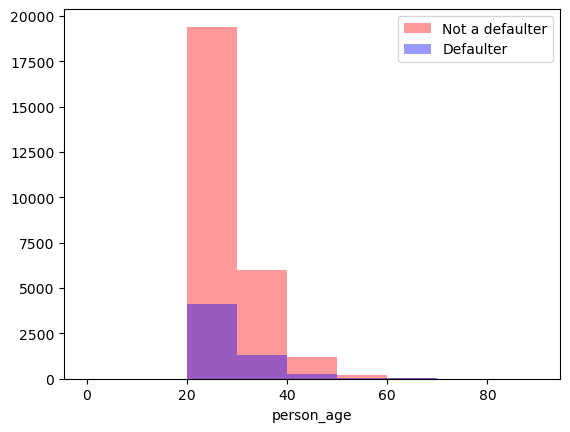

In [21]:
bins = range(0, 100, 10)
ax = sns.distplot(df.person_age[df.cb_person_default_on_file=='N'],
              color='red', kde=False, bins=bins, label="Not a defaulter")
sns.distplot(df.person_age[df.cb_person_default_on_file=='Y'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Defaulter")
plt.legend()
plt.show()

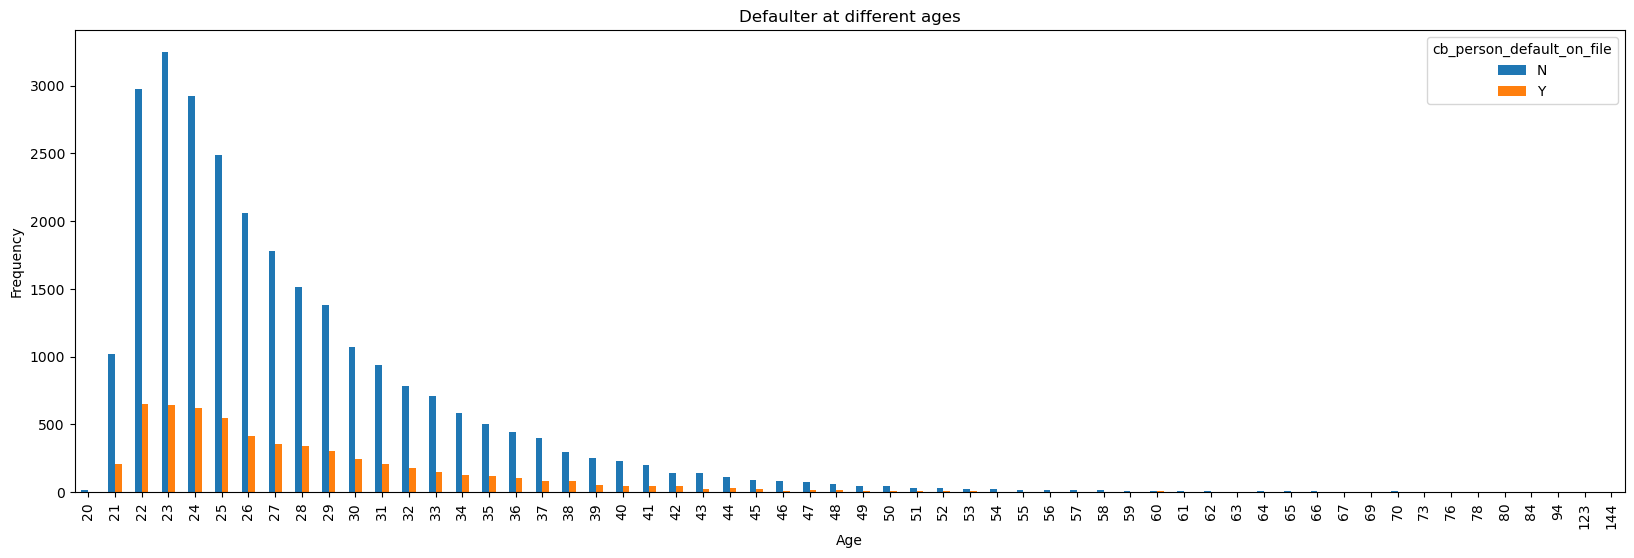

In [23]:
pd.crosstab(df.person_age,df.cb_person_default_on_file).plot(kind="bar",figsize=(20,6))
plt.title('Defaulter at different ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Outlier detection

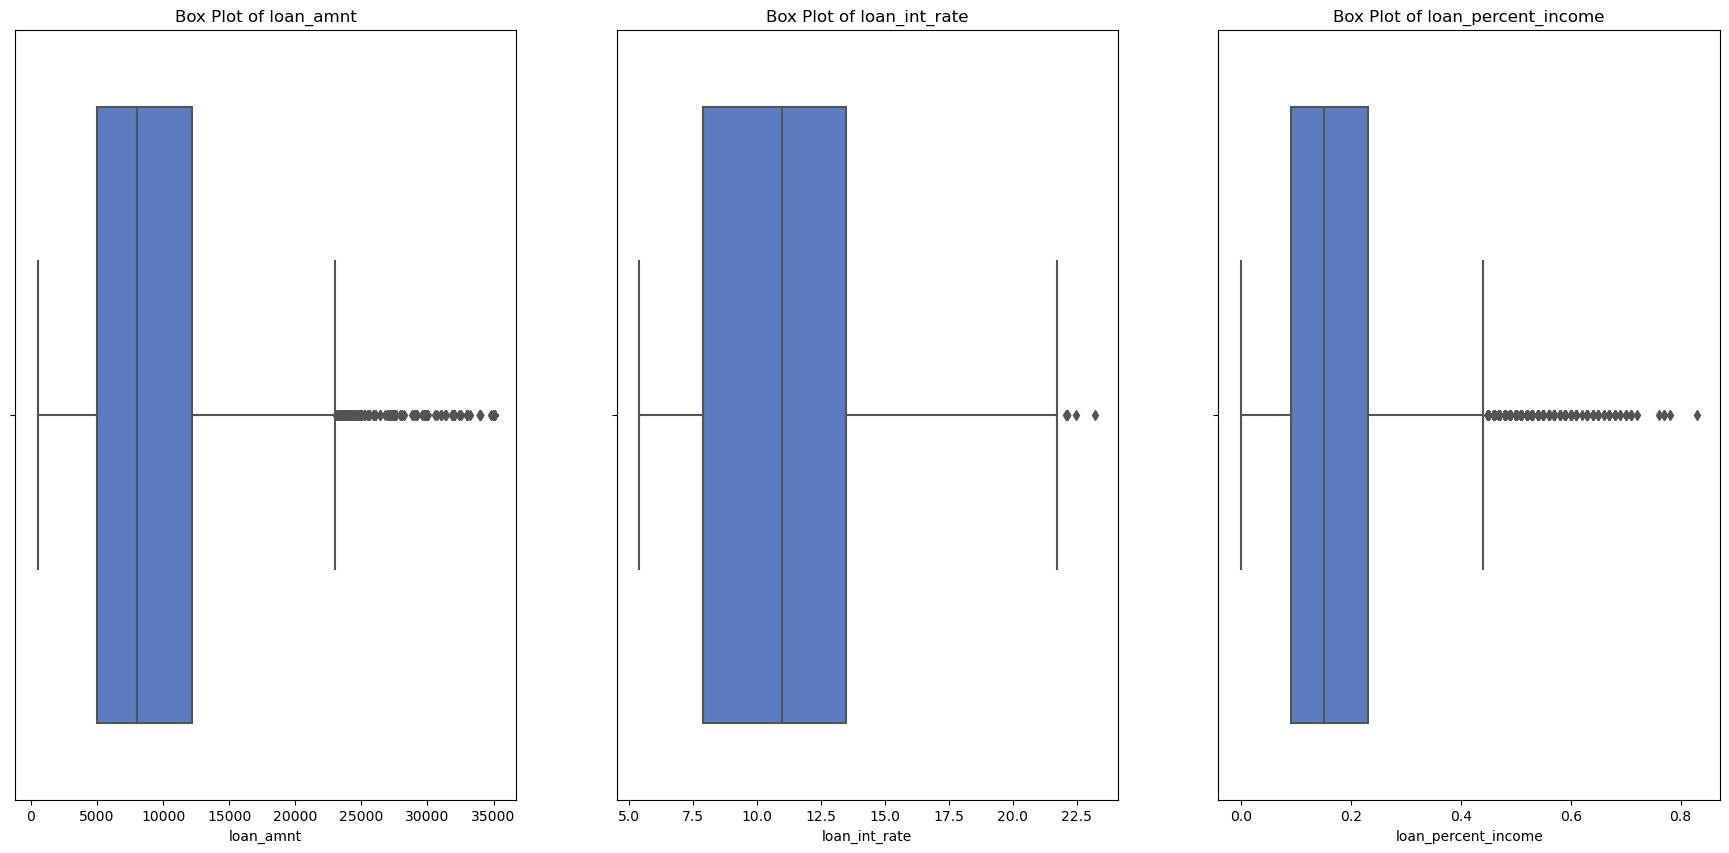

In [27]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

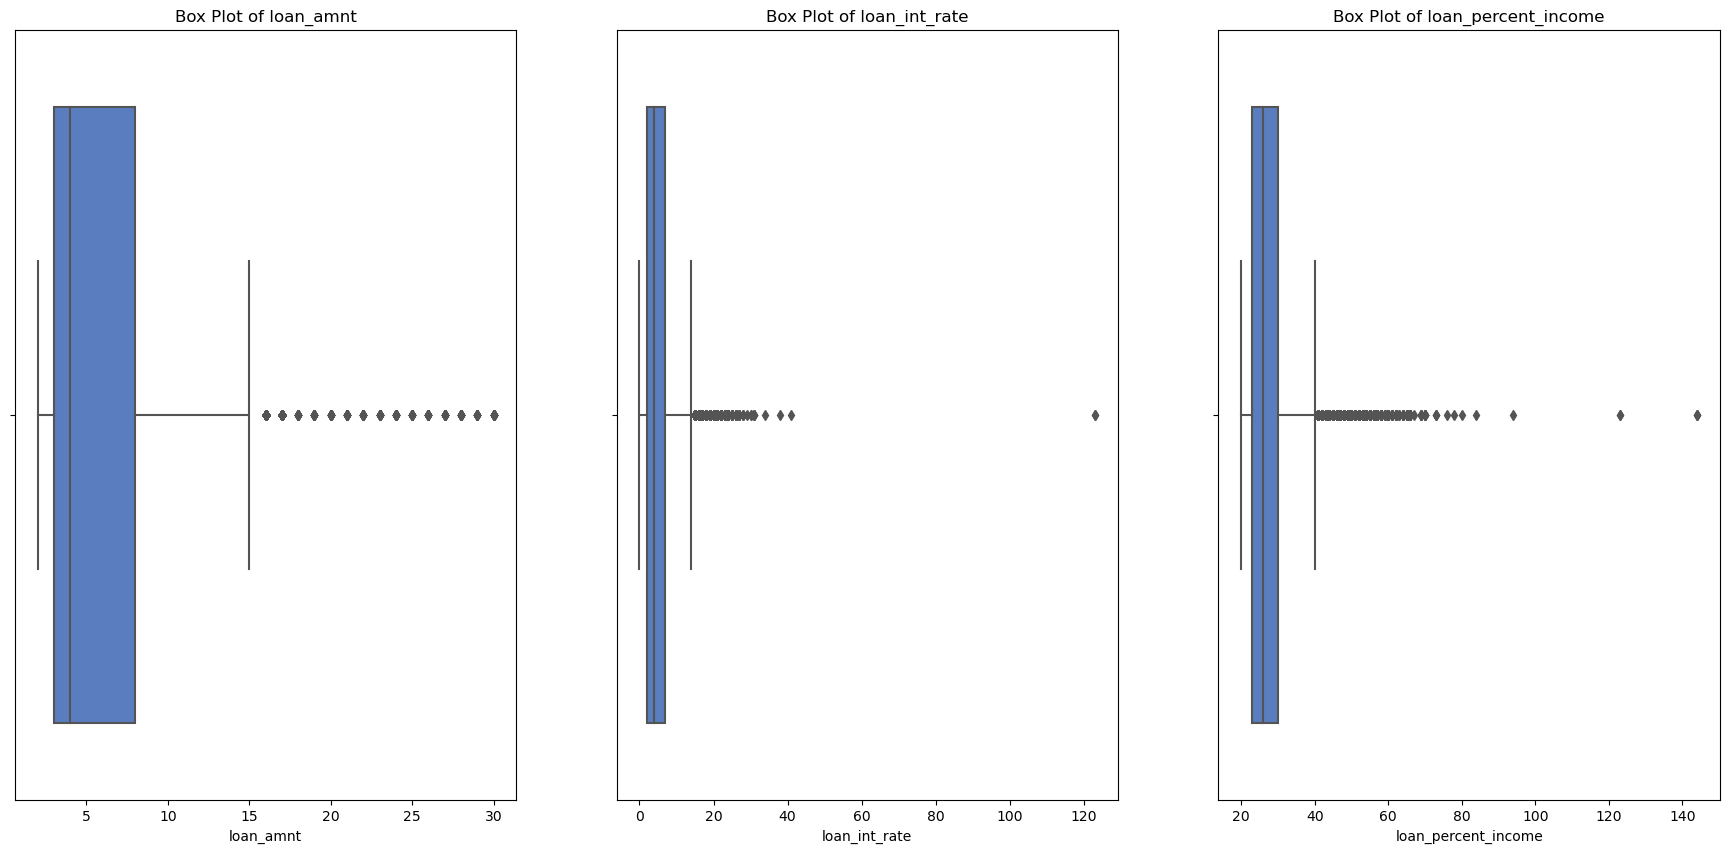

In [28]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['cb_person_cred_hist_length'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['person_emp_length'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['person_age'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

### Data pre processing

In [29]:
df= df.dropna()

In [30]:
df.shape

(28638, 12)

In [31]:
df = df.drop_duplicates()

In [32]:
df.shape

(28501, 12)

In [33]:
# dropping less important column.

In [34]:
df = df.drop(columns=['cb_person_cred_hist_length'])

In [35]:
df_num = df.select_dtypes(include='number')

In [36]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#### Removing Outliers

In [37]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [38]:
df.shape

(19019, 11)

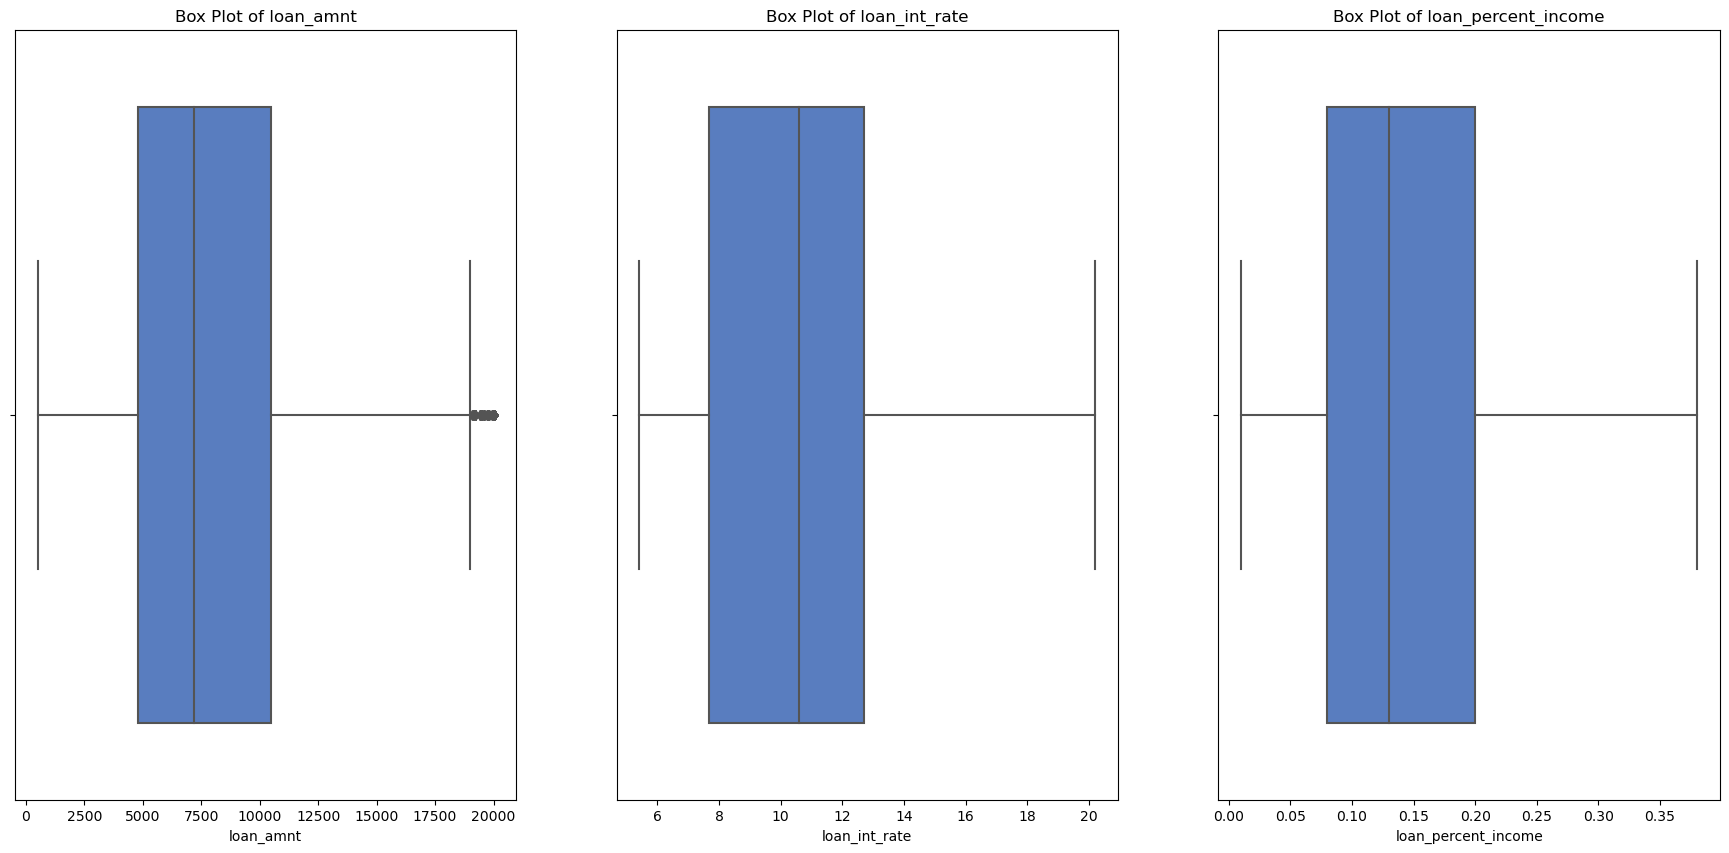

In [48]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

In [49]:
df_num = df.select_dtypes(include='number')

In [50]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [51]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [52]:
df.shape

(17594, 11)

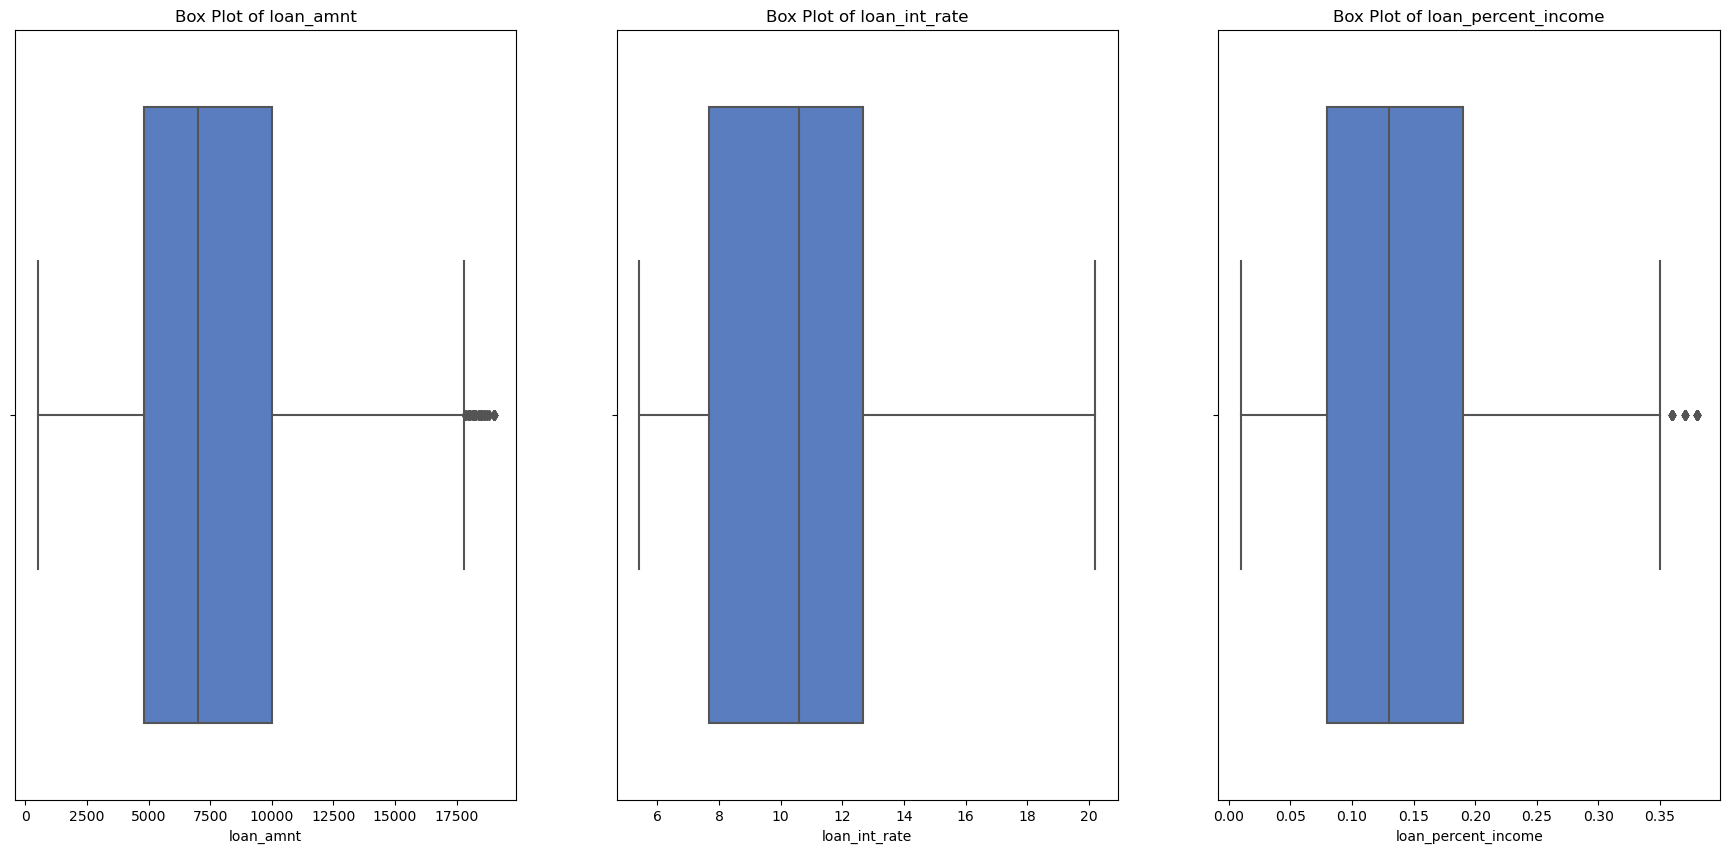

In [53]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

In [54]:
X = df.drop('cb_person_default_on_file', axis=1)
y = df['cb_person_default_on_file']
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0,0.13
65,22,12000,MORTGAGE,7.0,EDUCATION,D,1500,14.84,0,0.13
96,24,12360,OWN,2.0,MEDICAL,C,1600,13.57,0,0.13


In [55]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

#### Scaling Numerical Data

In [56]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [57]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

#### Encoding Categorical data

In [58]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [59]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [60]:
from sklearn import preprocessing


#### Label encoding

In [61]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_encoded= label_encoder.fit_transform(y)
  


In [62]:
y = pd.DataFrame(y_encoded)

In [63]:
y.head()

,0
0,0
1,0
2,0
3,1
4,0


#### Train test split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsClassifier


## KNN Classification

In [68]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knntrain_pred = Knn_model.predict(X_train)

In [71]:
from sklearn.metrics import f1_score


In [72]:
f1_score(y_train,knntrain_pred)

0.6940568475452197

In [73]:
knntest_pred = Knn_model.predict(X_test)
f1_score(y_test,knntest_pred)

0.49742002063983487

In [74]:
from sklearn.metrics import confusion_matrix, roc_auc_score 

### Confusion Matrix- KNN  (Train)

<Axes: >

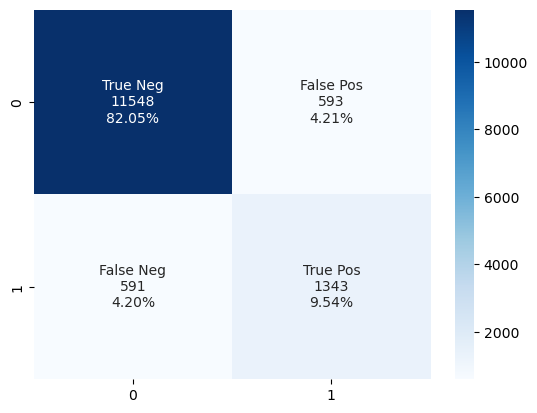

In [75]:
cf_matrix = confusion_matrix(y_train,knntrain_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Confusion Matrix- KNN  (Test)

<Axes: >

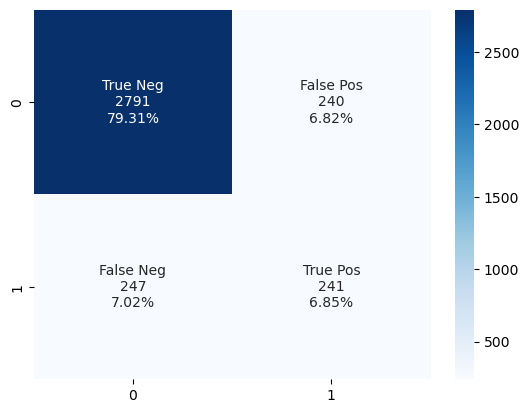

In [76]:
cf_matrix = confusion_matrix(y_test,knntest_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(C=1,class_weight={0:1,1:2.0})
modelLogistic.fit(X_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient are = ", modelLogistic.coef_)

The intercept b0=  [-1.72626244]
The coefficient are =  [[ 2.82219985e-02 -8.54340404e-04 -1.08622767e-01 -1.51427145e-02
   5.71323942e-01  0.00000000e+00 -5.69695238e-01 -3.03708975e-01
   6.83581022e-01 -1.97755105e-01 -1.92434860e-01 -8.87100391e-02
  -8.84600113e-02  1.01706672e-01 -3.95713282e-02  4.86459928e-02
   5.60707956e-02 -4.90044268e+00 -4.88814752e+00  2.61516101e+00
   2.45143049e+00  2.30015117e+00  2.41152961e+00  0.00000000e+00]]


In [78]:
y_pred_train= modelLogistic.predict(X_train)

In [79]:
y_pred_test= modelLogistic.predict(X_test)

In [81]:
f1_score(y_train,y_pred_train)

0.6688569946394605

In [82]:
f1_score(y_test,y_pred_test)

0.6792189679218967

### Confusion Matrix- Logistic  (Train)

<Axes: >

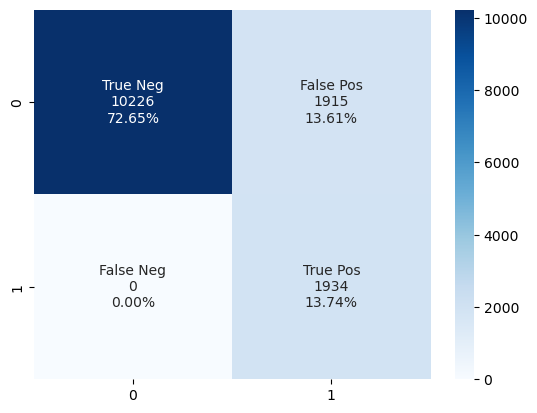

In [83]:
cf_matrix = confusion_matrix(y_train,y_pred_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Confusion Matrix- Logistic  (Test)

<Axes: >

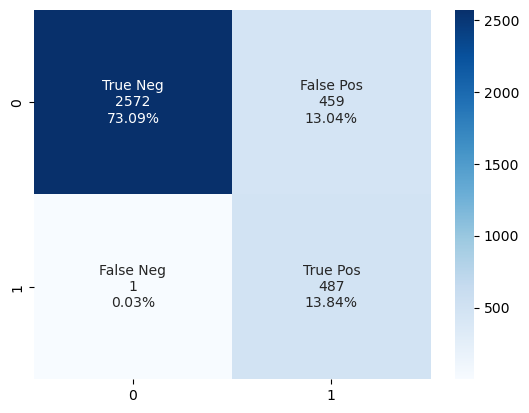

In [84]:
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier(max_depth=20,class_weight= {0:1,1:2.2})
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2.2}, max_depth=20)

In [87]:
preddt_train = dt.predict(X_train)

In [88]:
preddt_test = dt.predict(X_test)

In [89]:
f1_score(y_train,preddt_train)

0.9211478176995418

In [91]:
f1_score(y_test,preddt_test)

0.537864077669903

### Confusion Matrix- DT  (Train)

<Axes: >

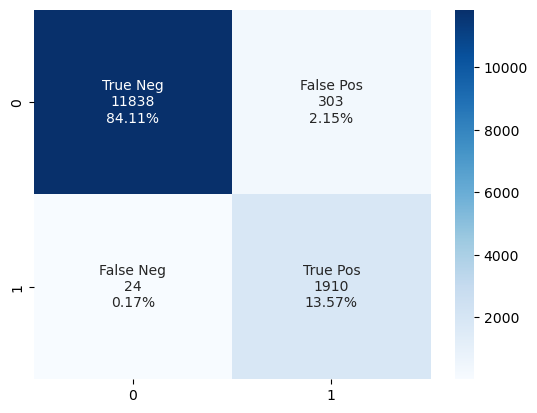

In [92]:
cf_matrix = confusion_matrix(y_train,preddt_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Confusion Matrix- DT  (Test)

<Axes: >

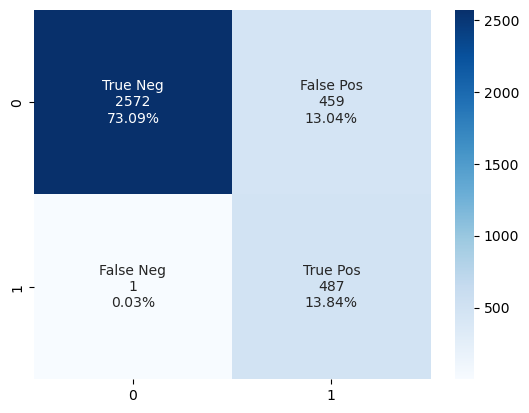

In [93]:
cf_matrix = confusion_matrix(y_test,y_pred_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [94]:
# auc scores
auc_score1 = roc_auc_score(y_test, knntest_pred)
auc_score2 = roc_auc_score(y_test, y_pred_test)
auc_score3 = roc_auc_score(y_test, preddt_test)

print(auc_score1, auc_score2,auc_score3)

0.7073353354138385 0.9232578248806055 0.7400965298473154


In [95]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, knntest_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_test, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, preddt_test, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

## Comparing KNN, Logistic and Decision Tree ROC curve

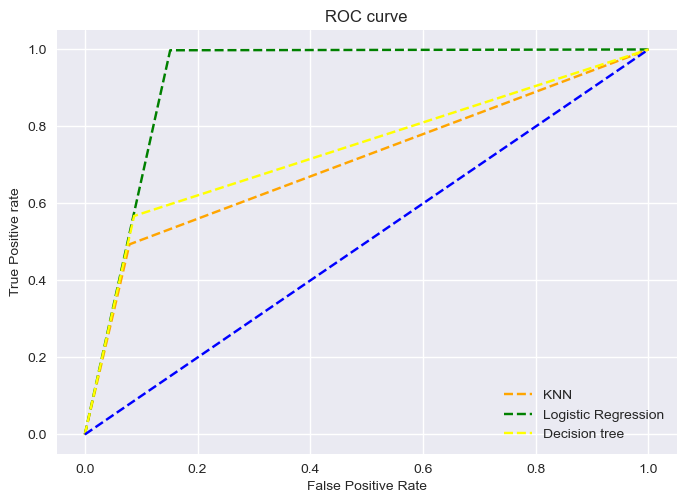

In [97]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();